In [740]:
%pylab inline
%config Inline.Backend.figure_format = 'retina'

from __future__ import division, print_function
import gwmemory

Populating the interactive namespace from numpy and matplotlib


In [741]:
!pip install lalsuite 

from pycbc import catalog
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc.waveform import td_approximants, fd_approximants
from pycbc.fft import fft

import numpy as np
import scipy as np
import pylab

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [742]:

from pycbc import catalog
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc.waveform import td_approximants, fd_approximants
from pycbc.fft import fft

import numpy as np
import scipy as np
import pylab

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
#times = np.linspace(-0.98, .01, 10000)

In [743]:
%matplotlib inline

import pylab
from pycbc.filter import resample_to_delta_t, highpass
from pycbc.catalog import Merger
from pycbc.psd import interpolate, inverse_spectrum_truncation

In [744]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform
from pycbc.filter.matchedfilter import match

<type 'dict'>
['__call__', '__class__', '__cmp__', '__delattr__', '__doc__', '__format__', '__func__', '__get__', '__getattribute__', '__hash__', '__init__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'im_class', 'im_func', 'im_self']
10001
10001


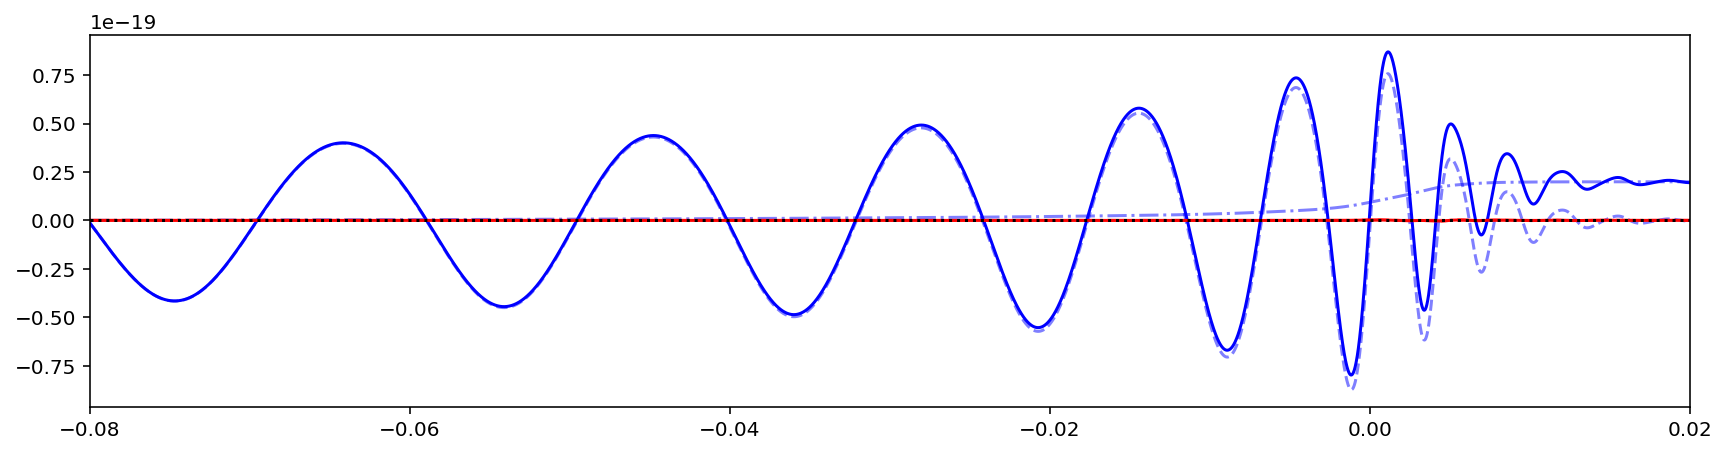

In [745]:
#In order to generate the memory we necessarily generate the time-domain oscillatory waveform
q = 1.
S1 = [0., 0., 0.]
S2 = [0., 0., 0.]

times = np.linspace(-0.08, 0.02, 10001)
surr = gwmemory.waveforms.Surrogate(q=q, S1=S1, S2=S2, MTot=60, distance=4, times=times)


inc = np.pi / 2
pol = 0

oscillatory, times = surr.time_domain_oscillatory(inc=inc, pol=pol)
memory, times = surr.time_domain_memory(inc=inc, pol=pol)

fig = figure(figsize=(12, 6))
fig.add_subplot(2, 1, 1)
plot(times, oscillatory['plus'], linestyle='--', color='b', alpha=0.5)
plot(times, oscillatory['cross'], linestyle='--', color='r', alpha=0.5)
plot(times, memory['plus'], linestyle='-.', color='b', alpha=0.5)
plot(times, memory['cross'], linestyle='-.', color='r', alpha=0.5)
plot(times, oscillatory['plus'] + memory['plus'], color='b')
plot(times, oscillatory['cross'] + memory['cross'], color='r')
axhline(0, linestyle=':', color='k')
xlim(-0.08, 0.02)

print (type (oscillatory))

print (dir(surr.time_domain_oscillatory))

print (len(times))

print (times.size)


tight_layout()
show()
close()

In [746]:
from scipy import signal

In [747]:
mem_plus = memory['plus']

In [748]:
window = signal.tukey(len(mem_plus))
win_mem= window*mem_plus
print (len(win_mem))
print(len(times))
help (np.fft.fft)
freq_mem = np.fft.rfft(win_mem)*dt

10001
10001
Help on function fft in module numpy.fft.fftpack:

fft(a, n=None, axis=-1, norm=None)
    Compute the one-dimensional discrete Fourier Transform.
    
    This function computes the one-dimensional *n*-point discrete Fourier
    Transform (DFT) with the efficient Fast Fourier Transform (FFT)
    algorithm [CT].
    
    Parameters
    ----------
    a : array_like
        Input array, can be complex.
    n : int, optional
        Length of the transformed axis of the output.
        If `n` is smaller than the length of the input, the input is cropped.
        If it is larger, the input is padded with zeros.  If `n` is not given,
        the length of the input along the axis specified by `axis` is used.
    axis : int, optional
        Axis over which to compute the FFT.  If not given, the last axis is
        used.
    norm : {None, "ortho"}, optional
        .. versionadded:: 1.10.0
    
        Normalization mode (see `numpy.fft`). Default is None.
    
    Returns
    -

In [749]:
dt = times[1] - times[0]
#print (help(np.fft.fftfreq))
fft_mem = np.fft.rfftfreq (len(win_mem),dt)
print (type(win_mem))                             
print (win_mem[0:10])
print (win_mem[50:60])
print (len(freq_mem))
print (len(fft_mem))

<type 'numpy.ndarray'>
[  0.00000000e+00   1.25778263e-31   7.54771514e-31   2.26465068e-30
   5.03332995e-30   9.43896548e-30   1.58599542e-29   2.46749324e-29
   3.62627751e-29   5.10025937e-29]
[  8.07734081e-27   8.56963023e-27   9.08156952e-27   9.61354641e-27
   1.01659488e-26   1.07391648e-26   1.13335825e-26   1.19495904e-26
   1.25875769e-26   1.32479305e-26]
5001
5001


In [750]:
osci_plus = oscillatory['plus']

In [751]:
window = signal.tukey(len(osci_plus))
win_osc= window*osci_plus
#print (len(win_osc))
freq_osc = np.fft.rfft(win_osc)*dt

In [752]:
dt = times[1] - times[0]
#print (help(np.fft.fftfreq))
fft_osc = np.fft.rfftfreq(len(win_osc), dt)
print (type(win_mem))                             
print (win_osc[0:10])
print (win_osc[50:60])
print (len(fft_osc))
print (len(freq_osc))

<type 'numpy.ndarray'>
[ -0.00000000e+00  -5.70288555e-28  -2.45775949e-27  -5.92744285e-27
  -1.12445255e-26  -1.86743434e-26  -2.84823744e-26  -4.09342304e-26
  -5.62956498e-26  -7.48324901e-26]
[ -6.85587617e-24  -7.24819694e-24  -7.65512084e-24  -8.07691084e-24
  -8.51382967e-24  -8.96613980e-24  -9.43410342e-24  -9.91798246e-24
  -1.04180385e-23  -1.09345328e-23]
5001
5001


In [753]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

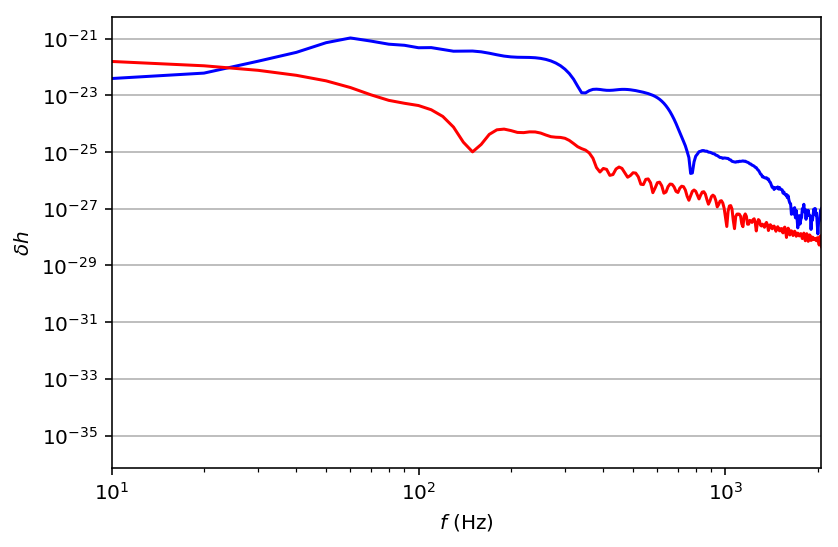

In [754]:
colours = ['r', 'b', 'g', 'k']

plt.figure()
plt.loglog(np.abs(fft_osc), np.abs(freq_osc) , linestyle='-', color='b', label = 'Osc fft')
plt.loglog(np.abs(fft_mem), np.abs(freq_mem), linestyle='-', color='r', label = 'Mem fft')


    

xlabel('$f$ (Hz)')
ylabel('$\delta h$')

xlim(10, 2048)
#ylim(1e-27, 1e-23)

ax = plt.gca()
ax.grid(True, axis='y')

tight_layout()
show()
close()

<class 'pycbc.types.timeseries.TimeSeries'>
0.0357142857143


Text(0.5,1,u'PSD')

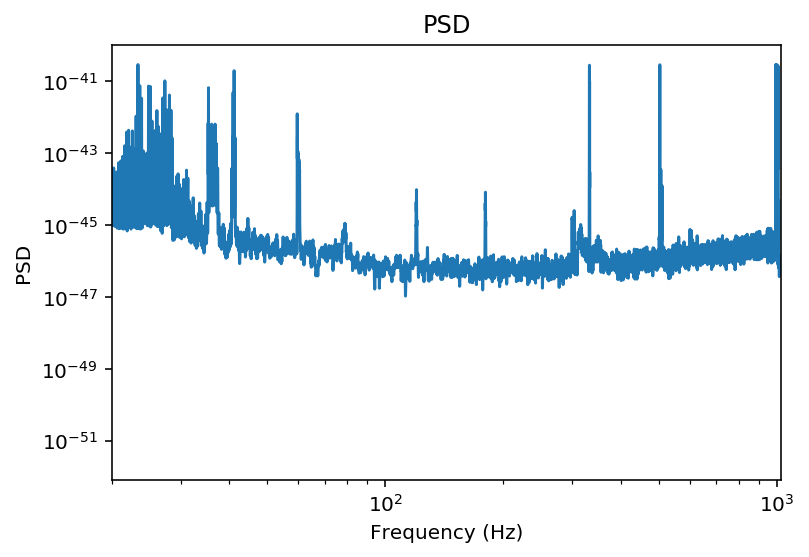

In [755]:
#Making psd 
merger = Merger("GW150914")

# Get the data from the Hanford detector
strain = merger.strain('H1')

# Remove the low frequency content and downsample the data to 2048Hz
strain = resample_to_delta_t(highpass(strain, 15.0), 1.0/2048).crop(2, 2)
print (type (strain))

# Freq. bin size:
df = strain.delta_f
print (df)


# Sample rate:
samp_rate = 4096


# Upper and lower freq. limits
f_lower = 20.
f_upper = 1024


# Making PSD 
psd = strain.psd(4)
psd = interpolate(psd, df)
noise = inverse_spectrum_truncation(psd, 4 * samp_rate)

fs = noise.delta_f * np.arange(noise.data.size)

# Plotting noise curve
plt.loglog(fs, noise)
plt.xlim(f_lower, f_upper)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.title("PSD")   

Text(0.5,1,u'ASD')

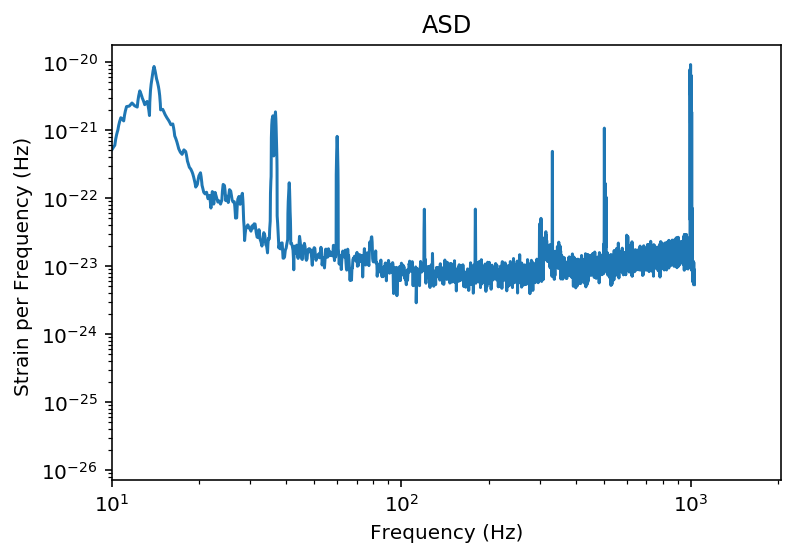

In [756]:
#ASD is what we want to graph
plt.loglog(fs,asd)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Strain per Frequency (Hz) ")
pylab.xlim(10, 2048)

plt.title("ASD")


In [757]:

from pycbc import catalog
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc.waveform import td_approximants, fd_approximants
from pycbc.fft import fft

import numpy as np
import scipy as np
import pylab

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
times = np.linspace(-0.98, .01, 10000)

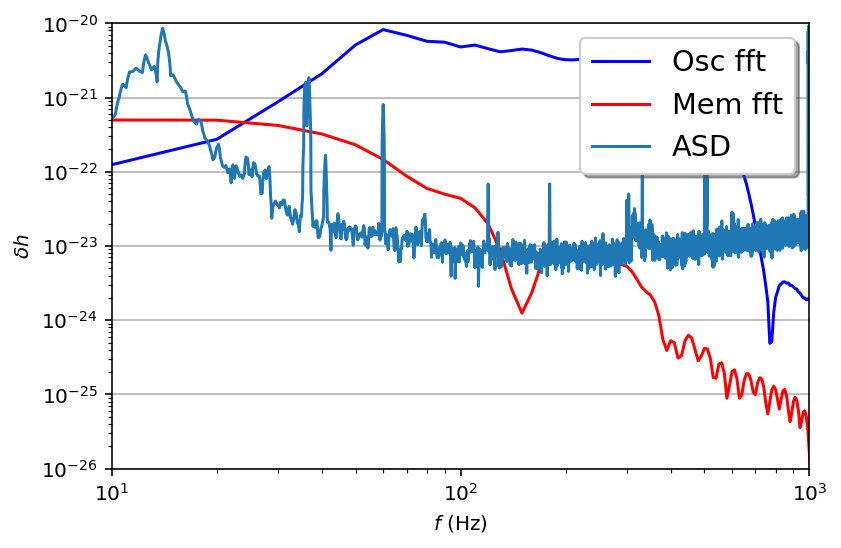

In [758]:
#Creating graph of the signal with the asd, memory, and oscillatory component combined
colours = ['r', 'b', 'g', 'k']

plt.figure()
plt.loglog(np.absolute(fft_osc),np.absolute(freq_osc*(sqrt(fft_osc))), linestyle='-', color='b', label='Osc fft')
plt.loglog(np.absolute(fft_mem),np.absolute(freq_mem*(sqrt(fft_osc))), linestyle='-', color='r', label='Mem fft')

#xlim(10, 2048)


               
#plotting asd
plt.loglog(fs,asd, label = 'ASD')
plt.legend(loc='upper right', shadow=True, fontsize='x-large')

#plot(asd, oscillatory['plus'] + memory['plus'], color='b')

    

xlabel('$f$ (Hz)')
ylabel('$\delta h$')

xlim(10, 1000)
ylim(1e-26, 1e-20)

ax = plt.gca()
ax.grid(True, axis='y')

tight_layout()
show()
close()

In [759]:
 #the noise weighted inner product
    # Function to calculate the noise weighted inner product of two vectors
# a and b (FFTs) with noise vector Sn (PSD); df = freq. bin size.a, b, and Sn must be same length
def InnerProduct(a, b, Sn, df):
    
    
    
    b_conj = np.conjugate(b)
    
    integrand = []
    
    for i in range(0,len(a)):
        intgrnd = a[i]*b_conj[i]/Sn[i]
        integrand.append(intgrnd)
            
    result_complex = 4*np.sum(integrand)*df
    
    result = np.real(result_complex)
    
    return result

In [760]:
 # Function to calculate the likelihood of data given parameters theta that
# generate strain h_theta (frequency series) with noise Sn (ASD); df = freq. bin size
#  h_theta, data, and Sn (ASD) must all be same length

def LogLikelihood(data, h_theta, Sn, df):
    
    h_minus_d = h_theta - data
    
    term = (-1.0/2)*InnerProduct(h_minus_d, h_minus_d, Sn, df)
    
    result = (term)

    return result

In [761]:
s = fft_osc + fft_mem

In [762]:
  h_trial = fft_osc + weight*fft_mem

In [763]:
import numpy as np
from scipy import signal
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz
import h5py
import json

# the IPython magic below must be commented out in the .py file, since it doesn't work there.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [764]:
#Interpolating to make  memory and oscillatory component (in freq domain)and asd equal. This will line them up
from scipy.interpolate import interp1d
asd_freq = asd #(data)
sampfreq = 4096
datafreq = np.fft.fftfreq(h_trial.size)*sampfreq
print(datafreq)
print(fs)
print(asd_freq)
interpolate_asd = np.interp(datafreq, fs, asd_freq)
#np.interp(np.abs(datafreq), freqs, data_psd)

[ 0.          0.81903619  1.63807239 ..., -2.45710858 -1.63807239
 -0.81903619]
[  0.00000000e+00   3.57142857e-02   7.14285714e-02 ...,   1.02392857e+03
   1.02396429e+03   1.02400000e+03]
[  1.40536153e-26   1.50627481e-26   1.60083934e-26 ...,   6.43093929e-24
   5.89906511e-24   5.31422226e-24]


In [771]:
#Template, adding in the lambda component. Will store log likelihood of the template
lambda_arr = np.arange(-10,10,.1)
like_arr = []
for weight in lambda_arr:
    h_trial = fft_osc + weight*fft_mem
    like_trial = LogLikelihood(s, h_trial, asd, df)
    like_arr.append(like_trial)
    print (like_trial)
    #print (like_arr)
    print (type(like_arr))


-4.47223286709e+36
<type 'list'>
-4.39128914826e+36
<type 'list'>
-4.31108464147e+36
<type 'list'>
-4.23161934672e+36
<type 'list'>
-4.15289326402e+36
<type 'list'>
-4.07490639336e+36
<type 'list'>
-3.99765873475e+36
<type 'list'>
-3.92115028818e+36
<type 'list'>
-3.84538105365e+36
<type 'list'>
-3.77035103117e+36
<type 'list'>
-3.69606022074e+36
<type 'list'>
-3.62250862234e+36
<type 'list'>
-3.54969623599e+36
<type 'list'>
-3.47762306169e+36
<type 'list'>
-3.40628909943e+36
<type 'list'>
-3.33569434921e+36
<type 'list'>
-3.26583881104e+36
<type 'list'>
-3.19672248491e+36
<type 'list'>
-3.12834537083e+36
<type 'list'>
-3.06070746879e+36
<type 'list'>
-2.9938087788e+36
<type 'list'>
-2.92764930084e+36
<type 'list'>
-2.86222903494e+36
<type 'list'>
-2.79754798107e+36
<type 'list'>
-2.73360613926e+36
<type 'list'>
-2.67040350948e+36
<type 'list'>
-2.60794009175e+36
<type 'list'>
-2.54621588606e+36
<type 'list'>
-2.48523089242e+36
<type 'list'>
-2.42498511082e+36
<type 'list'>
-2.36547854

In [766]:
#Normalizing the Likelihood array
Normal = asarray(like_arr)*dt
Norm = like_arr//Normal



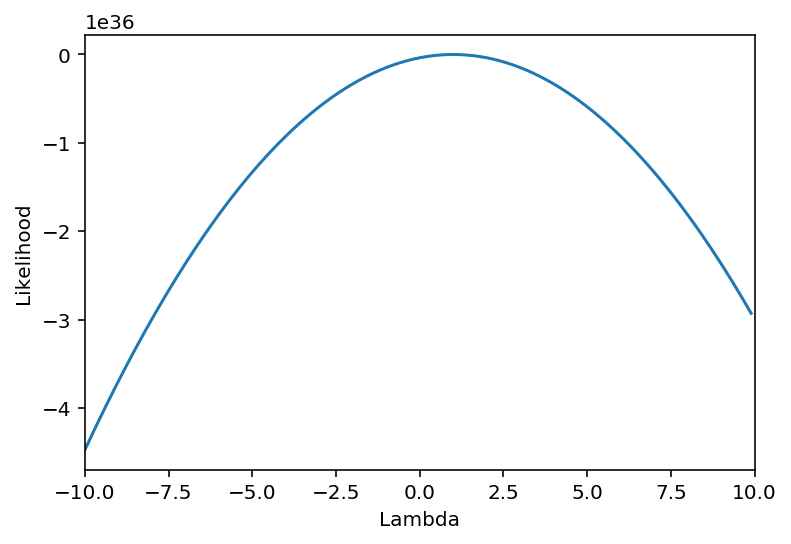

In [773]:
#Plotting the normalized likelihood array
import pylab
import numpy

x = lambda_arr 
y = np.array(like_arr)
#pylab.semilogy(x,y) 
pylab.plot(x,y)
pylab.xlim(-10, 10, 0.01)
pylab.xlabel('Lambda')
#pylab.ylim(-1000, 0)
pylab.ylabel('Likelihood')

 
pylab.show() 

In [768]:

import matplotlib.pyplot as plt
#from pycbc.waveform import get_td_waveform



In [769]:
print (len(s))
print (len(h_trial))
print (len(asd))

5001
5001
28673


In [770]:
import pylab
import numpy

x = lambda_arr 
y = plt.loglog(like_arr))

#pylab.semilogy(x,y) 
pylab.plot(x,y)
pylab.xlim(-10, 10, 0.01)
pylab.xlabel('Lambda')
#pylab.ylim(-1000, 0)
pylab.ylabel('Likelihood')

 
pylab.show() 

SyntaxError: invalid syntax (<ipython-input-770-bcd398e5e866>, line 5)

In [ ]:

x = lambda_arr 
y = -1*np.array(like_arr)
pylab.semilogy(x,y) 
pylab.xlim(-10, 10, 0.01)
pylab.xlabel('Lambda')
#pylab.ylim(0, 10)
pylab.ylabel('Likelihood')

 
pylab.show()